# End to End HR Attrition ML Project

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from datetime import datetime


In [ ]:
df=pd.read_csv("HumanResources.csv")
df.head()

,employee_id,first_name,last_name,gender,state,city,hire_date,department,job_title,education_level,performance_rating,overtime,base_salary,salary,birth_date,termination_date
0,00-73695798,Olimpiada,Fedotova,Female,Moscow,Moscow,8/28/2017,Sales,Sales Specialist,Bachelor,Good,No,79104,84511,7/25/1994,NaN
1,00-81018730,Ljubov',Baranova,Female,Moscow,Moscow,5/19/2022,Customer Service,Support Specialist,Bachelor,Satisfactory,Yes,54030,58165,12/4/1983,NaN
2,00-29139495,Mstislav,Trofimov,Male,Moscow,Moscow,4/10/2018,Operations,Operations Analyst,Master,Good,No,55805,60266,5/17/1974,NaN
3,00-60298696,Rodion,Pahomov,Male,Moscow,Moscow,11/11/2019,Sales,Sales Representative,Bachelor,Needs Improvement,No,53844,64566,5/2/1995,NaN
4,00-96356860,Zosima,Naumov,Male,Kazan,Kazan,1/1/2023,Operations,Inventory Specialist,High School,Needs Improvement,No,58672,61998,7/13/2004,NaN


In [ ]:
df['Attrition']=df['termination_date'].notna().astype(int)


In [ ]:
df.drop(columns=['employee_id','first_name','last_name','termination_date'], inplace =True)

In [ ]:
from pandas._libs.tslibs.timestamps import Timestamp

df['birth_date'] = pd.to_datetime(df['birth_date'])
df['hire_date'] = pd.to_datetime(df['hire_date'])

df['age'] = (pd.Timestamp.today() - df['birth_date']).dt.days // 365
df['experience_years'] = (pd.Timestamp.today() - df['hire_date']).dt.days // 365



In [ ]:
df['birth_date'] = df['birth_date'].astype('int64')
df['hire_date'] = df['hire_date'].astype('int64')


In [ ]:
df['gender']=df['gender'].map({'Male':1,'Female':0})
df['overtime']=df['overtime'].map({'Yes':1,'No':0})

education_map={'High School':1,'Bachelor':2,'Master':3,'Phd':4}
df['education_level']=df['education_level'].map(education_map)

performance_map={
    "Needs Improvment":1,
    "Satisfactory":2,
    'Good':3,
    'Excellent':4
}
df['performance_rating']=df['performance_rating'].map(performance_map)

In [ ]:
df=pd.get_dummies(df,columns=['state','city','department','job_title'],drop_first=True)

In [ ]:

## Split Data

In [ ]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
## Train model
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

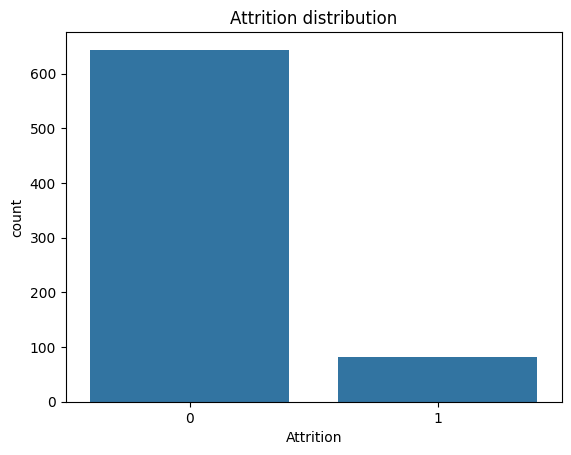

In [ ]:
# 1) Attrition Distribution
sns.countplot(x='Attrition',data=df)
plt.title("Attrition distribution")
plt.show()

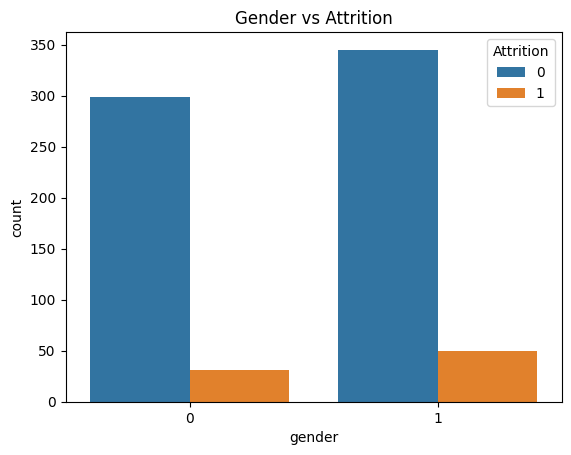

In [ ]:
#2.Gender vs Attrition
sns.countplot(x='gender',hue='Attrition', data=df)
plt.title("Gender vs Attrition")
plt.show()

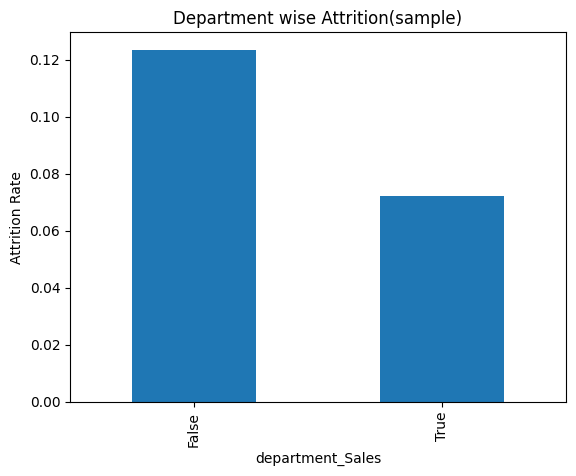

In [ ]:
## 3) Department wise Attrition
dept_attr=df.groupby('department_Sales')['Attrition'].mean()
dept_attr.plot(kind='bar')
plt.title("Department wise Attrition(sample)")
plt.ylabel('Attrition Rate')
plt.show()

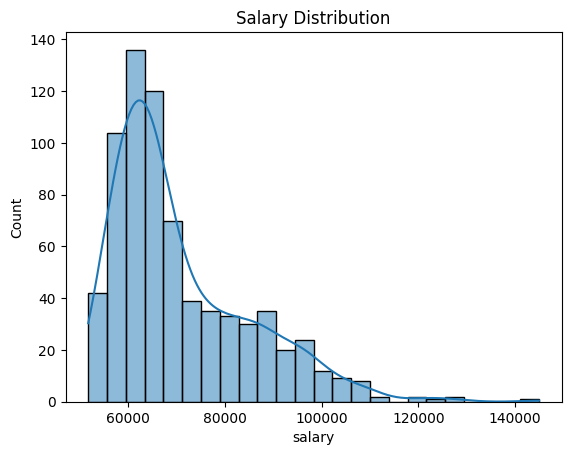

In [ ]:
## 4) Salary Distribution
sns.histplot(df['salary'],kde=True)
plt.title("Salary Distribution")
plt.show()

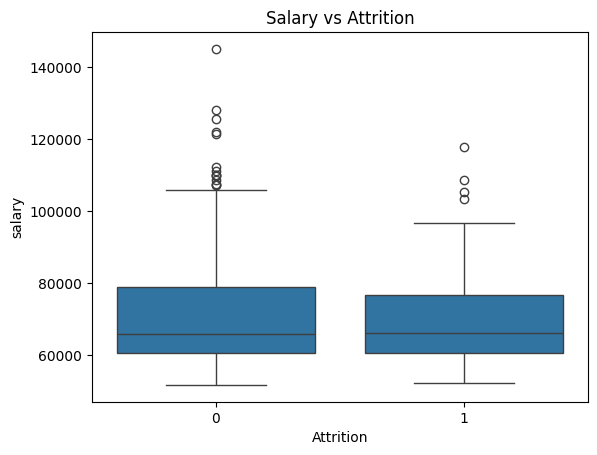

In [ ]:
## 5)salary vs attrition

sns.boxplot(x='Attrition',y='salary',data=df)
plt.title("Salary vs Attrition")
plt.show()

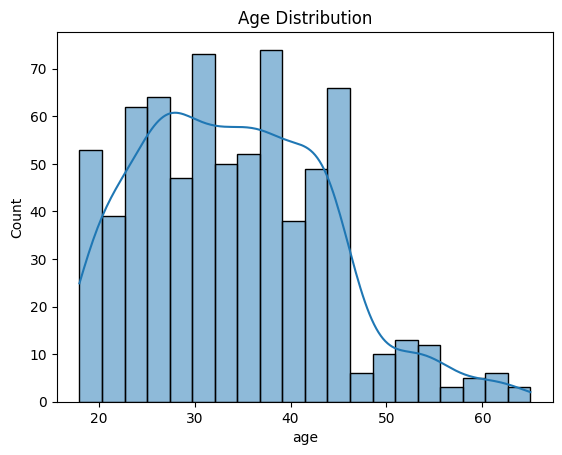

In [ ]:
## 6) Age Attribution
sns.histplot(df['age'],bins=20,kde=True)
plt.title("Age Distribution")
plt.show()


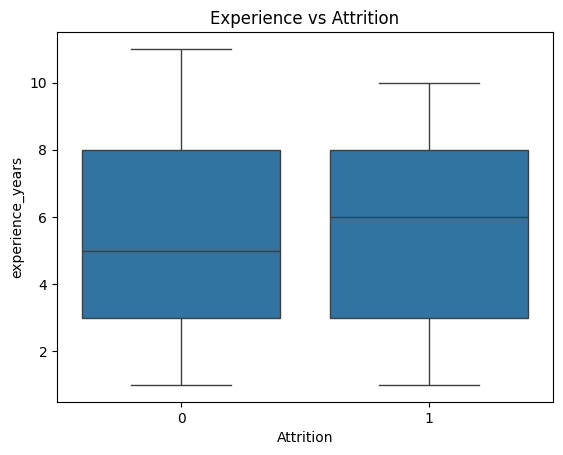

In [ ]:
## 7) Experience vs Attrition
sns.boxplot(x='Attrition',y='experience_years',data=df)
plt.title("Experience vs Attrition")
plt.show()

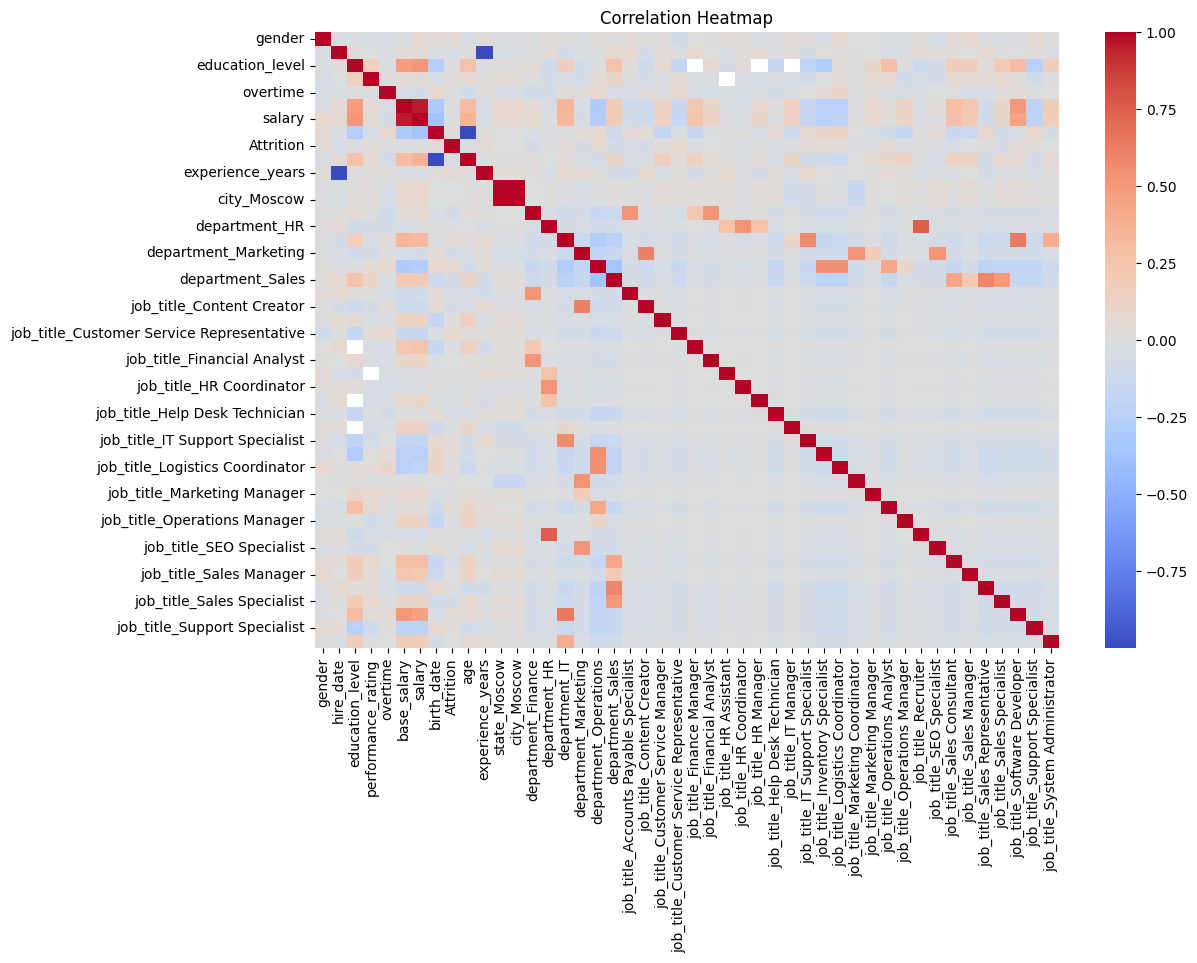

In [ ]:
## Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Assignment Question


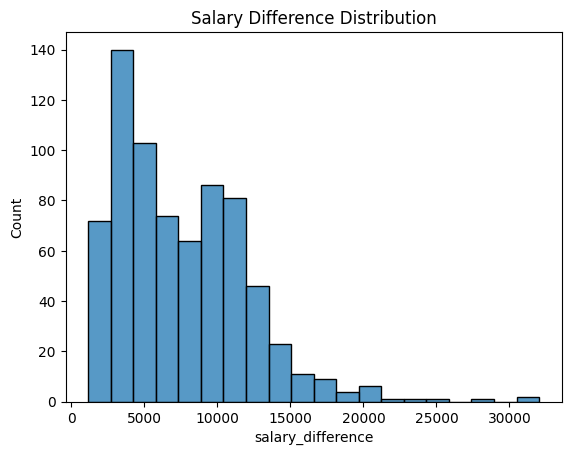

In [ ]:
df['salary_difference']=df['salary']-df['base_salary']
sns.histplot(df['salary_difference'], bins=20)
plt.title("Salary Difference Distribution")
plt.show()
